<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2004%20-%20Multistep%20Methods/4_Problem_Sheet/401a_Problem_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Sheet Question 1a

The general form of the population growth differential equation
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 4) \end{equation}
with the initial condition
\begin{equation}y(0)=1\end{equation}
For N=4
with the analytic (exact) solution
\begin{equation} y= 2e^{-t}+t-1.\end{equation}

# 3-step Adams Bashforth

The 3-step Adams Bashforth difference equation is
\begin{equation}w_{i+1} = w_{i} + \frac{h}{12}(23f(t_i,w_i)-16f(t_{i-1},w_{i-1})+5f(t_{i-2},w_{i-2})) \end{equation}
where
\begin{equation}w_{i+1} = w_{i} + \frac{h}{12}(23(t_i-w_i)-16(t_{i-1}-w_{i-1})+5(t_{i-2}-w_{i-2})) \end{equation}


In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


In [2]:
def myfun_ty(t,y):
    return t-y



#PLOTS
def Adams_Bashforth_3step(N,IC):

    x_end=4
    x_start=0
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+2;
    k_list=np.zeros(N)
    t=np.zeros(N)
    w=np.zeros(N)
    k_mat=np.zeros((4,N-1))
    Analytic_Solution=np.zeros(N)
    k=0
    w[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    t[0]=x_start
    t[1]=x_start+1*h
    t[2]=x_start+2*h
    w[1]=2*math.exp(-t[1])+t[1]-1
    w[2]=2*math.exp(-t[2])+t[2]-1
    Analytic_Solution[1]=2*math.exp(-t[1])+t[1]-1
    Analytic_Solution[1+1]=2*math.exp(-t[2])+t[2]-1

    for k in range (2,N-1):
        w[k+1]=w[k]+h/12.0*(23*myfun_ty(t[k],w[k])-16*myfun_ty(t[k-1],w[k-1])+5*myfun_ty(t[k-2],w[k-2]))
        t[k+1]=t[k]+h
        Analytic_Solution[k+1]=2*math.exp(-t[k+1])+t[k+1]-1

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,w,color='black')
    #ax.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,':o',color='blue')
    plt.title('Analytic Solution')

   
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,Analytic_Solution-w,':o',color='red')
    plt.title('Error')
 # --- title, explanatory text and save



    # --- title, explanatory text and save
    fig.suptitle(r"$y'=t-y$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    
    print(t)
    print(Analytic_Solution)
    print(w)

[0. 1. 2. 3. 4. 5.]
[1.         0.73575888 1.27067057 2.09957414 3.03663128 4.01347589]
[1.         0.73575888 1.27067057 1.89956382 3.14639438 3.61911085]


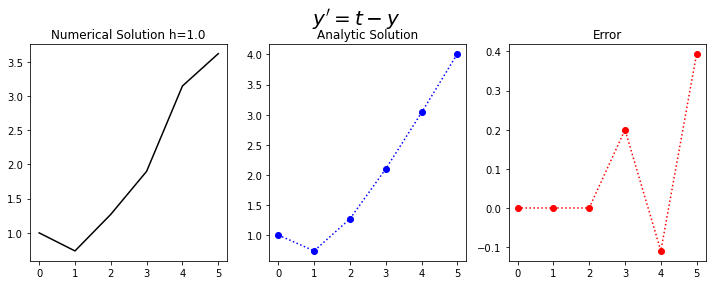

In [3]:
Adams_Bashforth_3step(4,1)